# Arithmetic Operations

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
%matplotlib inline  

## Read and display original image

Image shape: (491, 655, 3)


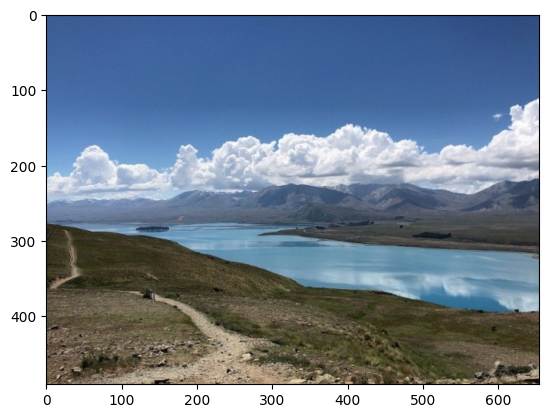

In [8]:
img = cv2.imread('../data/new-zealand-lake.jpg')

plt.imshow(img[:,:,::-1])
print(f"Image shape: {img.shape}")  

## Adjust brightness of image using add()

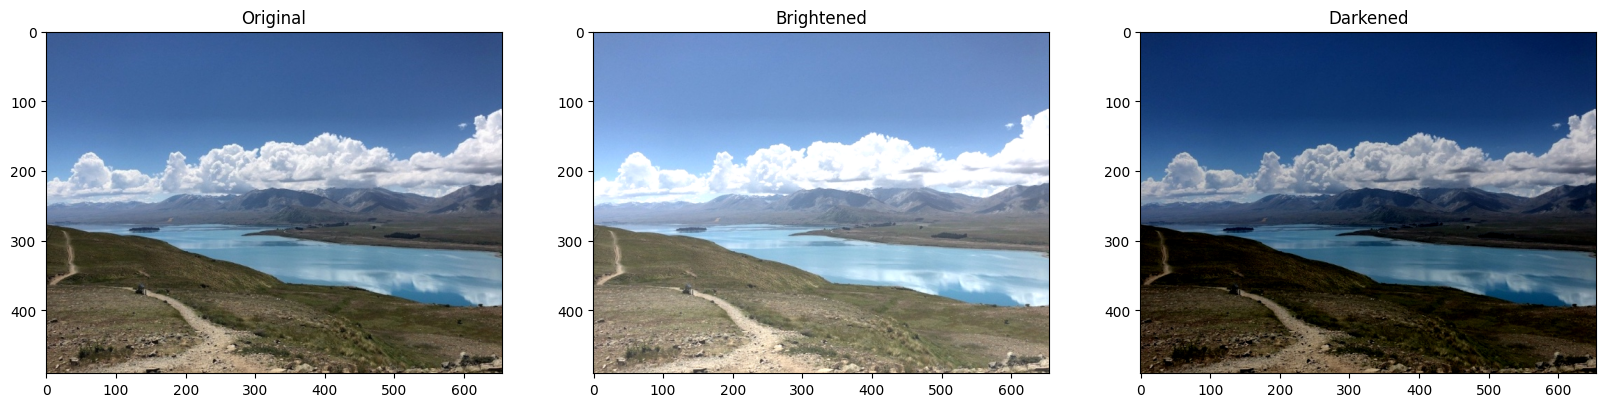

In [10]:
img = cv2.imread('../data/new-zealand-lake.jpg')

# create matrix of ones that matches original image shape.
adjustment = 50 
matrix = np.ones(img.shape, dtype="uint8") * adjustment

# Lower or increase brightness by adding matrix to image.
brightened = cv2.add(img, matrix)
darkened = cv2.subtract(img, matrix)

# Display images.
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].set_title('Original')
ax[0].imshow(img[:,:,::-1])
ax[1].set_title('Brightened')   
ax[1].imshow(brightened[:,:,::-1])
ax[2].set_title('Darkened')
ax[2].imshow(darkened[:,:,::-1])



## Adjust contrast of image using multiply()

Original Image: uint8
Decrease Matrix: float64
Final Image: uint8


Text(0.5, 1.0, 'High Contrast')

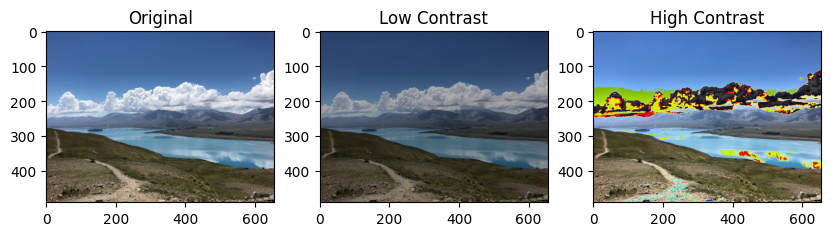

In [62]:
img = cv2.imread('../data/new-zealand-lake.jpg')

# Adjustment factors
decrease_factor = 0.7
increase_factor = 1.3 

# Create matrices of ones that match the shape of the image
decrease_mat = np.ones(img.shape)
increase_mat = np.ones(img.shape)

# Multiply matrices by factors
decrease_mat = decrease_mat * decrease_factor
increase_mat = increase_mat * increase_factor

# Check data types
print(f"Original Image: {img.dtype}")
print(f"Decrease Matrix: {decrease_mat.dtype}")

# Float to multiply correctly (same dataype), then convert back to uint8
img_lc = np.uint8(cv2.multiply(np.float64(img), decrease_mat))
img_hc = np.uint8(cv2.multiply(np.float64(img), increase_mat))

# If the below code is attemped, the values will be out of range of 255
# and they'll also be floating point values, which won't display correctly
# and cause errors in further processing due to not being uint8.
# img_lc = cv2.multiply(np.float64(img), decrease_mat)
# img_hc = cv2.multiply(np.float64(img), increase_mat)

# print(f"Original-Min: {img.min()}, Max: {img.max()}, Dtype: {img.dtype}")
# print(f"High Contrast-Min: {img_hc.min()}, Max: {img_hc.max()}, Dtype: {img_hc.dtype}")
# print(f"Low Contrast-Min: {img_lc.min()}, Max: {img_lc.max()},Dtype: {img_lc.dtype}")
#       # Original-Min: 0, Max: 255, Dtype: uint8
#       # High Contrast-Min: 0.0, Max: 306.0, Dtype: float64
#       # Low Contrast-Min: 0.0, Max: 204.0,Dtype: float64

# Check data types
print(f"Final Image: {img_lc.dtype}")

# Display
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(img[:,:,::-1]); ax[0].set_title('Original')
ax[1].imshow(img_lc[:,:,::-1]); ax[1].set_title('Low Contrast')
ax[2].imshow(img_hc[:,:,::-1]); ax[2].set_title('High Contrast')

**Check Data Range to ensure 0-255, High contrast shows black due to MOD**

In [63]:
print(f"Original-Min: {img.min()}, Max: {img.max()}, Dtype: {img.dtype}")
print(f"High Contrast-Min: {img_hc.min()}, Max: {img_hc.max()}, Dtype: {img_hc.dtype}")
print(f"Low Contrast-Min: {img_lc.min()}, Max: {img_lc.max()},Dtype: {img_lc.dtype}")


Original-Min: 0, Max: 255, Dtype: uint8
High Contrast-Min: 0, Max: 254, Dtype: uint8
Low Contrast-Min: 0, Max: 178,Dtype: uint8


## Overflow np.clip()

Original Image: uint8
Decrease Matrix: float64


Text(0.5, 1.0, 'High Contrast')

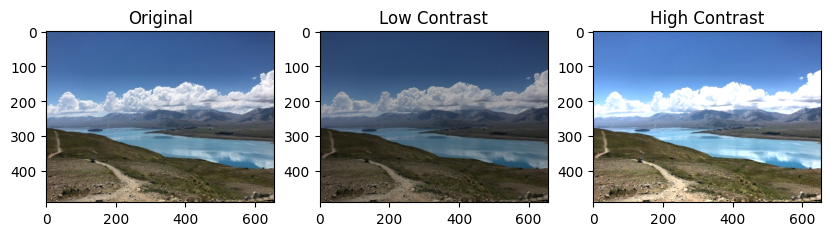

In [67]:
img = cv2.imread('../data/new-zealand-lake.jpg')

# Adjustment factors
decrease_factor = 0.7
increase_factor = 1.3 

# Create matrices of ones that match the shape of the image
decrease_mat = np.ones(img.shape)
increase_mat = np.ones(img.shape)

# Multiply matrices by factors
decrease_mat = decrease_mat * decrease_factor
increase_mat = increase_mat * increase_factor

# Check data types
print(f"Original Image: {img.dtype}")
print(f"Decrease Matrix: {decrease_mat.dtype}")

# Now you should get the correct results where there's no overflow (modulo 255). 
img_lc = np.uint8(cv2.multiply(np.float64(img), decrease_mat))
img_hc = np.uint8(np.clip(cv2.multiply(np.float64(img), increase_mat), 0,255))

# Display
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(img[:,:,::-1]); ax[0].set_title('Original')
ax[1].imshow(img_lc[:,:,::-1]); ax[1].set_title('Low Contrast')
ax[2].imshow(img_hc[:,:,::-1]); ax[2].set_title('High Contrast')

## Practice

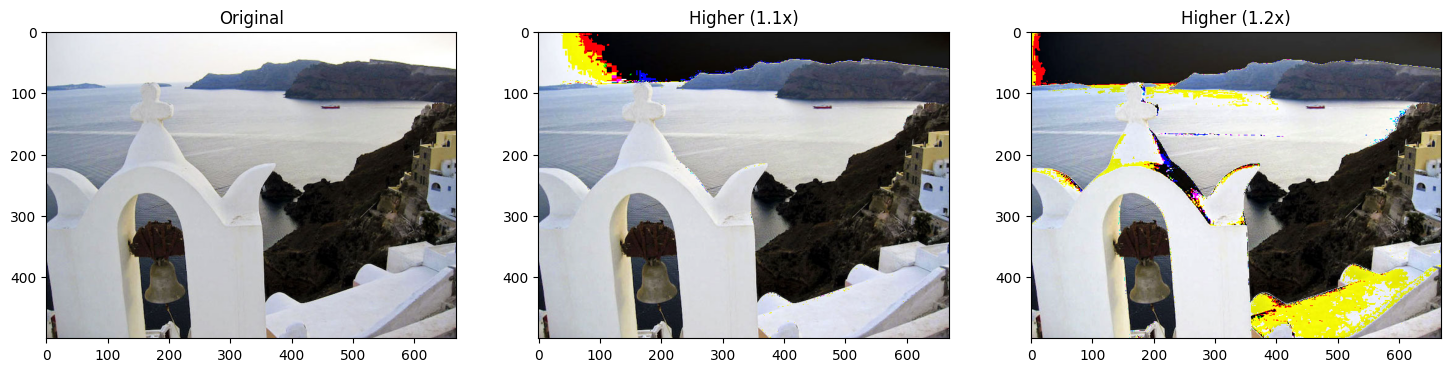

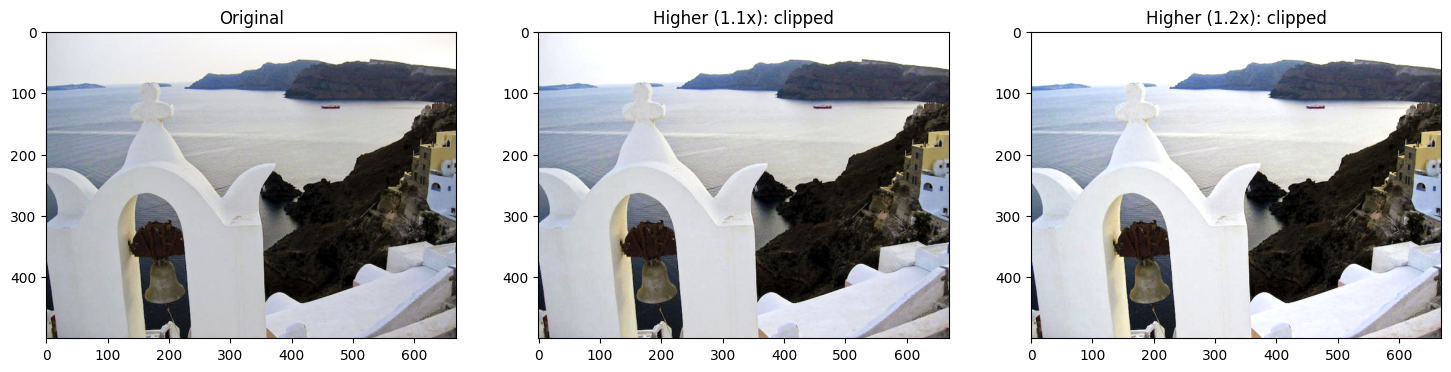

In [74]:
# Read the image ('Santorini.jpg')
image = '../data/Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Create a matrix of ones (with data type float64)
matrix_ones = np.ones(img.shape, dtype="float64")

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
img_higher1  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.1))
img_higher2  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.2))

# Display the images (original, higher (1.1x) , high (1.2x))
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)');

# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
img_higher1  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.1), 0, 255))
img_higher2  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.2), 0, 255))

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped');